<h1> Book Recommender <h1>
<h3> The focus of this project is to build a simple and straightforward Book Recommender using similarity as our driver for suggestions </h3>

In [5]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

import warnings
pd.set_option('display.max_columns', None)
warnings.filterwarnings("ignore")

In [6]:

# book_rating_path = "/workspaces/ProjectPortfolio/1. Data Science/2. KNN - Book Recommender/Datasets/BX-Book-Ratings.csv"
# book_path = "/workspaces/ProjectPortfolio/1. Data Science/2. KNN - Book Recommender/Datasets/BX-Books.csv"
# book_user_path = "/workspaces/ProjectPortfolio/1. Data Science/2. KNN - Book Recommender/Datasets/BX-Users.csv"

book_rating_path = r"L:\ProjectPortfolio\1. Data Science\2. KNN - Book Recommender\Datasets\BX-Book-Ratings.csv"
book_path = r"L:\ProjectPortfolio\1. Data Science\2. KNN - Book Recommender\Datasets\BX-Books.csv"
book_user_path = r"L:\ProjectPortfolio\1. Data Science\2. KNN - Book Recommender\Datasets\BX-Users.csv"


book_rating_df = pd.read_csv(
    book_rating_path,
    encoding = "ISO-8859-1",
    sep=";")

book_df = pd.read_csv(
    book_path,
    encoding = "ISO-8859-1",
    sep=";",
    on_bad_lines="skip")

book_user_df = pd.read_csv(
    book_user_path,
    encoding = "ISO-8859-1",
    sep=";")

In [7]:
book_rating_df.head()


User-ID        ISBN  Book-Rating
0   276725  034545104X            0
1   276726  0155061224            5
2   276727  0446520802            0
3   276729  052165615X            3
4   276729  0521795028            6

In [8]:
book_rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [9]:
book_df.head()

ISBN                                         Book-Title  \
0  0195153448                                Classical Mythology   
1  0002005018                                       Clara Callan   
2  0060973129                               Decision in Normandy   
3  0374157065  Flu: The Story of the Great Influenza Pandemic...   
4  0393045218                             The Mummies of Urumchi   

            Book-Author Year-Of-Publication                   Publisher  \
0    Mark P. O. Morford                2002     Oxford University Press   
1  Richard Bruce Wright                2001       HarperFlamingo Canada   
2          Carlo D'Este                1991             HarperPerennial   
3      Gina Bari Kolata                1999        Farrar Straus Giroux   
4       E. J. W. Barber                1999  W. W. Norton &amp; Company   

                                         Image-URL-S  \
0  http://images.amazon.com/images/P/0195153448.0...   
1  http://images.amazon.com/images/P/0002005018.0...   
2  http://images.amazon.com/images/P/0060973129.0...   
3  http://images.amazon.com/images/P/0374157065.0...   
4  http://images.amazon.com/images/P/0393045218.0...   

                                         Image-URL-M  \
0  http://images.amazon.com/images/P/0195153448.0...   
1  http://images.amazon.com/images/P/0002005018.0...   
2  http://images.amazon.com/images/P/0060973129.0...   
3  http://images.amazon.com/images/P/0374157065.0...   
4  http://images.amazon.com/images/P/0393045218.0...   

                                         Image-URL-L  
0  http://images.amazon.com/images/P/0195153448.0...  
1  http://images.amazon.com/images/P/0002005018.0...  
2  http://images.amazon.com/images/P/0060973129.0...  
3  http://images.amazon.com/images/P/0374157065.0...  
4  http://images.amazon.com/images/P/0393045218.0...

In [10]:
book_user_df.head()

User-ID                            Location   Age
0        1                  nyc, new york, usa   NaN
1        2           stockton, california, usa  18.0
2        3     moscow, yukon territory, russia   NaN
3        4           porto, v.n.gaia, portugal  17.0
4        5  farnborough, hants, united kingdom   NaN

In [11]:
book_merged_df = pd.merge(book_rating_df, book_user_df, on='User-ID', how='inner')
book_merged_df = pd.merge(book_merged_df, book_df, on='ISBN', how='inner')

book_merged_df.head()

User-ID        ISBN  Book-Rating                           Location   Age  \
0   276725  034545104X            0                  tyler, texas, usa   NaN   
1     2313  034545104X            5              cincinnati, ohio, usa  23.0   
2     6543  034545104X            0           strafford, missouri, usa  34.0   
3     8680  034545104X            5  st. charles county, missouri, usa   2.0   
4    10314  034545104X            9             beaverton, oregon, usa   NaN   

             Book-Title Book-Author Year-Of-Publication         Publisher  \
0  Flesh Tones: A Novel  M. J. Rose                2002  Ballantine Books   
1  Flesh Tones: A Novel  M. J. Rose                2002  Ballantine Books   
2  Flesh Tones: A Novel  M. J. Rose                2002  Ballantine Books   
3  Flesh Tones: A Novel  M. J. Rose                2002  Ballantine Books   
4  Flesh Tones: A Novel  M. J. Rose                2002  Ballantine Books   

                                         Image-URL-S  \
0  http://images.amazon.com/images/P/034545104X.0...   
1  http://images.amazon.com/images/P/034545104X.0...   
2  http://images.amazon.com/images/P/034545104X.0...   
3  http://images.amazon.com/images/P/034545104X.0...   
4  http://images.amazon.com/images/P/034545104X.0...   

                                         Image-URL-M  \
0  http://images.amazon.com/images/P/034545104X.0...   
1  http://images.amazon.com/images/P/034545104X.0...   
2  http://images.amazon.com/images/P/034545104X.0...   
3  http://images.amazon.com/images/P/034545104X.0...   
4  http://images.amazon.com/images/P/034545104X.0...   

                                         Image-URL-L  
0  http://images.amazon.com/images/P/034545104X.0...  
1  http://images.amazon.com/images/P/034545104X.0...  
2  http://images.amazon.com/images/P/034545104X.0...  
3  http://images.amazon.com/images/P/034545104X.0...  
4  http://images.amazon.com/images/P/034545104X.0...

In [12]:
book_rating_df.isna().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [13]:
book_rating_df['Book-Rating'].value_counts()

Book-Rating
0     716109
8     103736
10     78610
7      76457
9      67541
5      50974
6      36924
4       8904
3       5996
2       2759
1       1770
Name: count, dtype: int64

<h4> Since this dataset is non-null I will assume that any zero rating will count as a non-rated book and will thus be exluded from the dataset </h4>

In [14]:
book_merged_clean_df = book_merged_df[book_merged_df['Book-Rating']>0]

<h3><b> Personal Note:</b> </h3>
<h4> Based on value counts and the histogram below, the distribution is left-skewed (negatively skewed).</h4>
<h5>I was actually anticipating more of a inverted bell curve or un-bell curve since I've noticed people tend to rate and review items when they feel strongly towards the item either negatively or positivly. <br>
My example for this is Amazon reviews for items. Often they will have a high count of 1 and 5 star reviews with a drop off in count between the two extremes. <br>
In this case, people tend to rate more favourably with a 5 rating being the drop-off point. </h5>

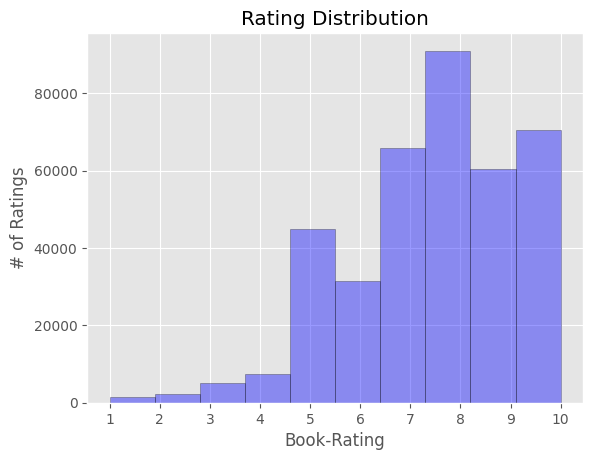

In [15]:
sns.distplot(book_merged_clean_df['Book-Rating'], hist=True, kde=False, hist_kws={'edgecolor': 'black'}, kde_kws={'linewidth': 2},bins=10,
             color='blue')
plt.title("Rating Distribution")
plt.ylabel("# of Ratings")
plt.xticks(np.arange(1, 11, 1))
plt.show()

In [16]:
sample_rating_df = book_merged_clean_df.sample(frac=.1, random_state=1) 
sample_rating_df.shape

(38076, 12)

In [17]:
# Create Item-user matrix using pivot_table()
sample_rating_pivot = sample_rating_df.pivot_table(index='Book-Title', columns='User-ID', values='Book-Rating').fillna(0)

# Show top-5 records
sample_rating_pivot.head()

User-ID                                             22      53      88      \
Book-Title                                                                   
 A Light in the Storm: The Civil War Diary of A...     0.0     0.0     0.0   
 Earth Prayers From around the World: 365 Praye...     0.0     0.0     0.0   
 Q-Zone (Star Trek The Next Generation, Book 48)       0.0     0.0     0.0   
 Summonings: Books of Magic, Vol. 2                    0.0     0.0     0.0   
 the Devil Will Drag You Under                         0.0     0.0     0.0   

User-ID                                             99      125     129     \
Book-Title                                                                   
 A Light in the Storm: The Civil War Diary of A...     0.0     0.0     0.0   
 Earth Prayers From around the World: 365 Praye...     0.0     0.0     0.0   
 Q-Zone (Star Trek The Next Generation, Book 48)       0.0     0.0     0.0   
 Summonings: Books of Magic, Vol. 2                    0.0     0.0     0.0   
 the Devil Will Drag You Under                         0.0     0.0     0.0   

User-ID                                             178     243     244     \
Book-Title                                                                   
 A Light in the Storm: The Civil War Diary of A...     0.0     0.0     0.0   
 Earth Prayers From around the World: 365 Praye...     0.0     0.0     0.0   
 Q-Zone (Star Trek The Next Generation, Book 48)       0.0     0.0     0.0   
 Summonings: Books of Magic, Vol. 2                    0.0     0.0     0.0   
 the Devil Will Drag You Under                         0.0     0.0     0.0   

User-ID                                             254     289     302     \
Book-Title                                                                   
 A Light in the Storm: The Civil War Diary of A...     0.0     0.0     0.0   
 Earth Prayers From around the World: 365 Praye...     0.0     0.0     0.0   
 Q-Zone (Star Trek The Next Generation, Book 48)       0.0     0.0     0.0   
 Summonings: Books of Magic, Vol. 2                    0.0     0.0     0.0   
 the Devil Will Drag You Under                         0.0     0.0     0.0   

User-ID                                             376     387     392     \
Book-Title                                                                   
 A Light in the Storm: The Civil War Diary of A...     0.0     0.0     0.0   
 Earth Prayers From around the World: 365 Praye...     0.0     0.0     0.0   
 Q-Zone (Star Trek The Next Generation, Book 48)       0.0     0.0     0.0   
 Summonings: Books of Magic, Vol. 2                    0.0     0.0     0.0   
 the Devil Will Drag You Under                         0.0     0.0     0.0   

User-ID                                             424     431     487     \
Book-Title                                                                   
 A Light in the Storm: The Civil War Diary of A...     0.0     0.0     0.0   
 Earth Prayers From around the World: 365 Praye...     0.0     0.0     0.0   
 Q-Zone (Star Trek The Next Generation, Book 48)       0.0     0.0     0.0   
 Summonings: Books of Magic, Vol. 2                    0.0     0.0     0.0   
 the Devil Will Drag You Under                         0.0     0.0     0.0   

User-ID                                             503     505     507     \
Book-Title                                                                   
 A Light in the Storm: The Civil War Diary of A...     0.0     0.0     0.0   
 Earth Prayers From around the World: 365 Praye...     0.0     0.0     0.0   
 Q-Zone (Star Trek The Next Generation, Book 48)       0.0     0.0     0.0   
 Summonings: Books of Magic, Vol. 2                    0.0     0.0     0.0   
 the Devil Will Drag You Under                         0.0     0.0     0.0   

User-ID                                             558     638     641     \
Book-Title                                                                   
 A Light in the

In [18]:
from sklearn.neighbors import NearestNeighbors

model_nn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=10, n_jobs=-1)

model_nn.fit(sample_rating_pivot)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=10)

In [19]:
# Get top 10 nearest neighbors
indices = model_nn.kneighbors(sample_rating_pivot.loc[['Sophies Choice']].values, 10, return_distance=False)

# Print the recommended books
print("Recommended Books:")
print("==================")
for index, value in enumerate(sample_rating_pivot.index[indices[0]]):
    print((index + 1), ". ", value)

Recommended Books:
1 .  Sophies Choice
2 .  The T-Factor Diet
3 .  Song of Solomon (Oprah's Book Club (Paperback))
4 .  Song of Kali
5 .  Song of Solomon
6 .  Song of Solomon (Everyman's Library, 216)
7 .  Song and Dance Man
8 .  Song of the Nightingale (Harper Monogram)
9 .  Song of the Magdalene (Point)
10 .  Son of the Shadows (The Sevenwaters Trilogy)


***
<h3>Increasing the Dataset size</h3>

In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors

In [2]:
# book_rating_path = "/workspaces/ProjectPortfolio/1. Data Science/2. KNN - Book Recommender/Datasets/BX-Book-Ratings.csv"
# book_path = "/workspaces/ProjectPortfolio/1. Data Science/2. KNN - Book Recommender/Datasets/BX-Books.csv"
# book_user_path = "/workspaces/ProjectPortfolio/1. Data Science/2. KNN - Book Recommender/Datasets/BX-Users.csv"

book_rating_path = r"L:\ProjectPortfolio\1. Data Science\2. KNN - Book Recommender\Datasets\BX-Book-Ratings.csv"
book_path = r"L:\ProjectPortfolio\1. Data Science\2. KNN - Book Recommender\Datasets\BX-Books.csv"
book_user_path = r"L:\ProjectPortfolio\1. Data Science\2. KNN - Book Recommender\Datasets\BX-Users.csv"


book_rating_df = pd.read_csv(
    book_rating_path,
    encoding = "ISO-8859-1",
    sep=";")

book_df = pd.read_csv(
    book_path,
    encoding = "ISO-8859-1",
    sep=";",
    on_bad_lines="skip")

book_user_df = pd.read_csv(
    book_user_path,
    encoding = "ISO-8859-1",
    sep=";")

C:\Users\marty\AppData\Local\Temp\ipykernel_27532\2666101302.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  book_df = pd.read_csv(


In [3]:
book_merged_df = pd.merge(book_rating_df, book_user_df, on='User-ID', how='inner')
book_merged_df = pd.merge(book_merged_df, book_df, on='ISBN', how='inner')
book_merged_clean_df = book_merged_df[book_merged_df['Book-Rating']>0]

Since this isn't a production machine, I won't be attempting the do the entire 1+ million record dataset. <br>
The code below will gather a quarter of the dataset and will create an empty dataframe in which the for loop will populate in batches.<br>
<br>
This will reduce the total strain of the computer by iteratively updating the pivot in batches until the full dataset is complete.



In [4]:
sample_rating_df = book_merged_clean_df.sample(frac=0.25, random_state=1)

unique_user_ids = sample_rating_df['User-ID'].unique()
unique_book_titles = sample_rating_df['Book-Title'].unique()

full_pivot = pd.DataFrame(0, index=unique_book_titles, columns=unique_user_ids)

batch_size = 10000  

for start_idx in range(0, len(sample_rating_df), batch_size):
    end_idx = min(start_idx + batch_size, len(sample_rating_df))
    batch_df = sample_rating_df.iloc[start_idx:end_idx]

    batch_pivot = batch_df.pivot_table(index='Book-Title', columns='User-ID', values='Book-Rating', fill_value=0)
    
    full_pivot.update(batch_pivot)

In [5]:
full_pivot

35433   7346    135380  \
Stein und Flï¿½?Â¶te und das ist noch nicht alles.       9       0       0   
Christmas Cookie Murder: A Lucy Stone Mystery (...       0       0       0   
The Rainmaker                                            0       0       8   
Running Out of Time                                      0       0       0   
Die Totenwï¿½?Â¤scherin.                                 0       0       0   
...                                                    ...     ...     ...   
A Moveable Feast (Moveable Feast Srs)                    0       0       0   
Dinosaur in a Haystack: Reflections in Natural ...       0       0       0   
Daisy Says \Here We Go Round the Mulberry Bush\...       0       0       0   
Saffron Days in L.A. : Tales of a Buddhist Monk...       0       0       0   
A Life of Her Own: The Transformation of a Coun...       0       0       0   

                                                    113955  125276  266717  \
Stein und Flï¿½?Â¶te und das ist noch nicht alles.       0       0       0   
Christmas Cookie Murder: A Lucy Stone Mystery (...       0       0       0   
The Rainmaker                                            0       0       0   
Running Out of Time                                      0       0       0   
Die Totenwï¿½?Â¤scherin.                                 0       8       0   
...                                                    ...     ...     ...   
A Moveable Feast (Moveable Feast Srs)                    0       0       0   
Dinosaur in a Haystack: Reflections in Natural ...       0       0       0   
Daisy Says \Here We Go Round the Mulberry Bush\...       0       0       0   
Saffron Days in L.A. : Tales of a Buddhist Monk...       0       0       0   
A Life of Her Own: The Transformation of a Coun...       0       0       0   

                                                    38672   77809   184401  \
Stein und Flï¿½?Â¶te und das ist noch nicht alles.       0       0       0   
Christmas Cookie Murder: A Lucy Stone Mystery (...       0       0       0   
The Rainmaker                                            0       7       0   
Running Out of Time                                      0       0       0   
Die Totenwï¿½?Â¤scherin.                                 0       0       0   
...                                                    ...     ...     ...   
A Moveable Feast (Moveable Feast Srs)                    0       0       0   
Dinosaur in a Haystack: Reflections in Natural ...       0       0       0   
Daisy Says \Here We Go Round the Mulberry Bush\...       0       0       0   
Saffron Days in L.A. : Tales of a Buddhist Monk...       0       0       0   
A Life of Her Own: The Transformation of a Coun...       0       0       0   

                                                    169934  ...  83775   \
Stein und Flï¿½?Â¶te und das ist noch nicht alles.       0  ...       0   
Christmas Cookie Murder: A Lucy Stone Mystery (...       0  ...       0   
The Rainmaker                                            0  ...       0   
Running Out of Time                                      0  ...       0   
Die Totenwï¿½?Â¤scherin.                                 0  ...       0   
...                                                    ...  ...     ...   
A Moveable Feast (Moveable Feast Srs)                    0  ...       0   
Dinosaur in a Haystack: Reflections in Natural ...       0  ...       0   
Daisy Says \Here We Go Round the Mulberry Bush\...       0  ...       0   
Saffron Days in L.A. : Tales of a Buddhist Monk...       0  ...       0   
A Life of Her Own: The Transformation of a Coun...       0  ...       0   

                                                    278545  113202  13968   \
Stein und Flï¿½?Â¶te und das ist noch nicht alles.       0       0       0   
Christmas Cookie Murder: A Lucy Stone Mystery (...       0       0       0   
The Rainmaker                                            0       0       0   
Running Out of Time         

In [6]:
model_nn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=10, n_jobs=-1)
model_nn.fit(full_pivot)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=10)

This segment will take the selected book item and create a pivot table matching the one used to fit the model.<br>
Since the number of features need to match that of the training set. The for loop will populate the pivot table until it meets the total neccesary features.

Then the model will select the top 10 most similar books based on the cosine similary equation and retrieve the results.

In [7]:
def get_top_similar_books(selected_book_title):
    selected_book_df = sample_rating_df[sample_rating_df['Book-Title'] == selected_book_title]
    selected_book_pivot = selected_book_df.pivot_table(index='Book-Title', columns='User-ID', values='Book-Rating').fillna(0)

    for user_id in full_pivot.columns:
        if user_id not in selected_book_pivot.columns:
            selected_book_pivot[user_id] = 0

    distances, indices = model_nn.kneighbors(selected_book_pivot, n_neighbors=10)

    similar_books_indices = indices[0][1:] 
    similar_books = full_pivot.index[similar_books_indices]

    return similar_books

In a web browser, there can be an input/search bar that will take the user's selection and then run the function to gather the books which can return a top 10 list.<br>
In a production service, the goal would be to speed up the compute time so that the result return quickly.

In [8]:
selected_book_title = "Sophies Choice"
top_similar_books = get_top_similar_books(selected_book_title)
print("Top 10 Books Similar to", selected_book_title)
for i, book in enumerate(top_similar_books):
    print(f"{i + 1}. {book}")

C:\Users\marty\AppData\Local\Temp\ipykernel_27532\4077488093.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  selected_book_pivot[user_id] = 0


Top 10 Books Similar to Sophies Choice
1. Mysteries of People and Places (Strange Unsolved Mysteries)
2. Die Erben des Medicus.
3. The Journal of William Thomas Emerson: A Revolutionary War Patriot (My Name Is America)
4. Flying Aces of World War I
5. Im Haus meines Feindes.
6. Eissegler.
7. Drachentrï¿½?Â¤nen.
8. Regulator
9. Stein und Flï¿½?Â¶te und das ist noch nicht alles.
10. Help! I'm Trapped in Santa's Body (Help! I'm Trapped (Paperback))
